<a href="https://colab.research.google.com/github/manyasahay/Time-Series/blob/main/Passenger_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/AirPassengers (1).csv')

In [ ]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [ ]:
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)
print(data)

         Month  #Passengers
0   1949-01-01          112
1   1949-02-01          118
2   1949-03-01          132
3   1949-04-01          129
4   1949-05-01          121
..         ...          ...
139 1960-08-01          606
140 1960-09-01          508
141 1960-10-01          461
142 1960-11-01          390
143 1960-12-01          432

[144 rows x 2 columns]


<ipython-input-7-985207d22284>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)


In [ ]:
data.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [ ]:
data['lag1'] = data['#Passengers'].shift(1)
print(data)

         Month  #Passengers   lag1
0   1949-01-01          112    NaN
1   1949-02-01          118  112.0
2   1949-03-01          132  118.0
3   1949-04-01          129  132.0
4   1949-05-01          121  129.0
..         ...          ...    ...
139 1960-08-01          606  622.0
140 1960-09-01          508  606.0
141 1960-10-01          461  508.0
142 1960-11-01          390  461.0
143 1960-12-01          432  390.0

[144 rows x 3 columns]


In [ ]:
data['lag2'] = data['#Passengers'].shift(2)
data['lag3'] = data['#Passengers'].shift(3)
data['lag4'] = data['#Passengers'].shift(4)
print(data)

         Month  #Passengers   lag1   lag2   lag3   lag4
0   1949-01-01          112    NaN    NaN    NaN    NaN
1   1949-02-01          118  112.0    NaN    NaN    NaN
2   1949-03-01          132  118.0  112.0    NaN    NaN
3   1949-04-01          129  132.0  118.0  112.0    NaN
4   1949-05-01          121  129.0  132.0  118.0  112.0
..         ...          ...    ...    ...    ...    ...
139 1960-08-01          606  622.0  535.0  472.0  461.0
140 1960-09-01          508  606.0  622.0  535.0  472.0
141 1960-10-01          461  508.0  606.0  622.0  535.0
142 1960-11-01          390  461.0  508.0  606.0  622.0
143 1960-12-01          432  390.0  461.0  508.0  606.0

[144 rows x 6 columns]


In [ ]:
data.drop(data.head(4).index, inplace=True)
print(data)

         Month  #Passengers   lag1   lag2   lag3   lag4
7   1949-08-01          148  148.0  135.0  121.0  129.0
8   1949-09-01          136  148.0  148.0  135.0  121.0
9   1949-10-01          119  136.0  148.0  148.0  135.0
10  1949-11-01          104  119.0  136.0  148.0  148.0
11  1949-12-01          118  104.0  119.0  136.0  148.0
..         ...          ...    ...    ...    ...    ...
139 1960-08-01          606  622.0  535.0  472.0  461.0
140 1960-09-01          508  606.0  622.0  535.0  472.0
141 1960-10-01          461  508.0  606.0  622.0  535.0
142 1960-11-01          390  461.0  508.0  606.0  622.0
143 1960-12-01          432  390.0  461.0  508.0  606.0

[137 rows x 6 columns]


Regression model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
data.describe()

,Month,#Passengers,lag1,lag2,lag3,lag4
count,137,137.000000,137.000000,137.000000,137.000000,137.000000
mean,1955-04-01 17:41:36.350364992,288.087591,286.014599,284.153285,281.671533,278.905109
min,1949-08-01 00:00:00,104.000000,104.000000,104.000000,104.000000,104.000000
25%,1952-06-01 00:00:00,191.000000,188.000000,184.000000,183.000000,181.000000
50%,1955-04-01 00:00:00,271.000000,270.000000,269.000000,267.000000,264.000000
75%,1958-02-01 00:00:00,362.000000,362.000000,360.000000,359.000000,356.000000
max,1960-12-01 00:00:00,622.000000,622.000000,622.000000,622.000000,622.000000
std,NaN,117.766998,117.714697,118.073873,117.902509,116.995845


In [ ]:
X = data.iloc[:, [2,3,4,5]].values
y = data['#Passengers'].values
print(X)


[[148. 135. 121. 129.]
 [148. 148. 135. 121.]
 [136. 148. 148. 135.]
 [119. 136. 148. 148.]
 [104. 119. 136. 148.]
 [118. 104. 119. 136.]
 [115. 118. 104. 119.]
 [126. 115. 118. 104.]
 [141. 126. 115. 118.]
 [135. 141. 126. 115.]
 [125. 135. 141. 126.]
 [149. 125. 135. 141.]
 [170. 149. 125. 135.]
 [170. 170. 149. 125.]
 [158. 170. 170. 149.]
 [133. 158. 170. 170.]
 [114. 133. 158. 170.]
 [140. 114. 133. 158.]
 [145. 140. 114. 133.]
 [150. 145. 140. 114.]
 [178. 150. 145. 140.]
 [163. 178. 150. 145.]
 [172. 163. 178. 150.]
 [178. 172. 163. 178.]
 [199. 178. 172. 163.]
 [199. 199. 178. 172.]
 [184. 199. 199. 178.]
 [162. 184. 199. 199.]
 [146. 162. 184. 199.]
 [166. 146. 162. 184.]
 [171. 166. 146. 162.]
 [180. 171. 166. 146.]
 [193. 180. 171. 166.]
 [181. 193. 180. 171.]
 [183. 181. 193. 180.]
 [218. 183. 181. 193.]
 [230. 218. 183. 181.]
 [242. 230. 218. 183.]
 [209. 242. 230. 218.]
 [191. 209. 242. 230.]
 [172. 191. 209. 242.]
 [194. 172. 191. 209.]
 [196. 194. 172. 191.]
 [196. 196.

In [ ]:
print(y)

[148 136 119 104 118 115 126 141 135 125 149 170 170 158 133 114 140 145
 150 178 163 172 178 199 199 184 162 146 166 171 180 193 181 183 218 230
 242 209 191 172 194 196 196 236 235 229 243 264 272 237 211 180 201 204
 188 235 227 234 264 302 293 259 229 203 229 242 233 267 269 270 315 364
 347 312 274 237 278 284 277 317 313 318 374 413 405 355 306 271 306 315
 301 356 348 355 422 465 467 404 347 305 336 340 318 362 348 363 435 491
 505 404 359 310 337 360 342 406 396 420 472 548 559 463 407 362 405 417
 391 419 461 472 535 622 606 508 461 390 432]


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3)
split_index = int(len(X)*0.80)
X_train,X_test = X[:split_index],X[split_index:]
y_train,y_test = y[:split_index],y[split_index:]

In [ ]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict result
y_pred = regressor.predict(X_test)

In [ ]:
print(y_pred)

[494.43764048 363.90248502 362.20259556 304.75384311 357.26767895
 364.01343013 331.26747855 430.28268766 379.97443255 427.5976433
 483.27693146 559.86638805 542.75455991 423.41731092 404.3494673
 358.91383969 428.74066032 412.71820766 378.07262124 432.14245167
 468.6171476  464.73819741 550.01852087 634.16680184 576.90174017
 471.55008099 461.17641106 375.50726251]


In [ ]:
y_test

array([404, 359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463,
       407, 362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461,
       390, 432])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

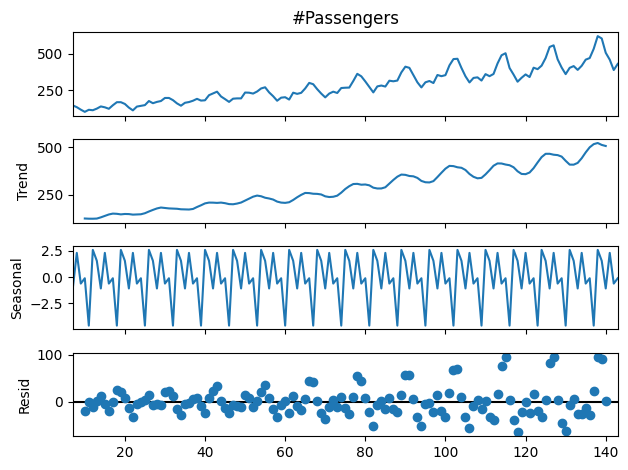

In [ ]:
decompose = seasonal_decompose(data['#Passengers'],model='additive', period=7)
decompose.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

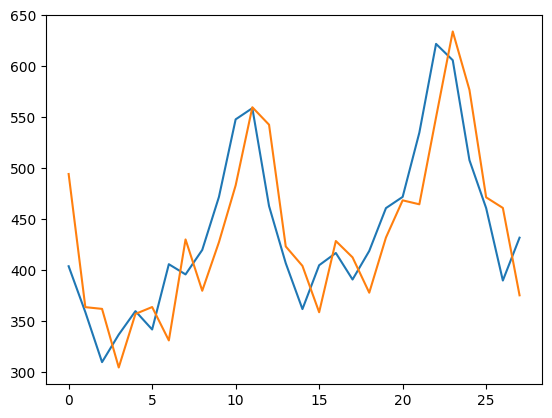

In [ ]:
plt.plot(y_test,label ='Actual')
plt.plot(y_pred,label='Predicted')
plt.show

Neural network model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [ ]:
# Compilation of model
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 79465.8203
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 50276.3203
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 29133.9316
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 17718.8867
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 9995.7129
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 4904.8345
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 2343.6318
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 2151.3491
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 2697.8943
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 3020.1042
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 2734.9604
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 2218.7947
Epoch 13/100
4/4 [===

In [ ]:
ypred2 = model.predict(X_test)

1/1 [==============================] - 0s 25ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

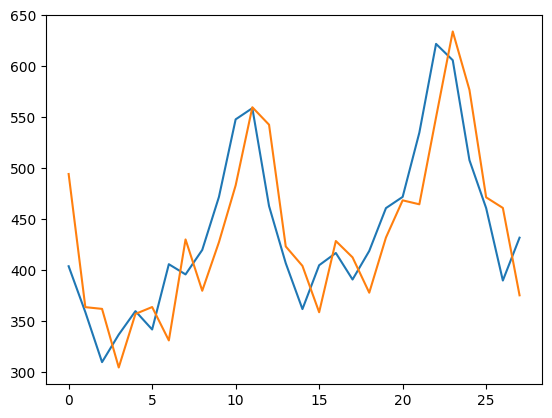

In [ ]:
plt.plot(y_test,label ='Actual')
plt.plot(y,label='Predicted')
plt.show